Import of libraries

In [ ]:
# Data analysis and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

# Stadistical analysis and data preprocessing
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro

# Machine learning predicction 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Load and combination of dataframes

In [1]:
df = pd.read_pickle("df_data.pkl")

NameError: name 'pd' is not defined

In [ ]:
# display firts rows of each dataset
display(df.head())

,name,url,category,subcategory,description,addresses,reporter
0,twitter.com/cz_binance,https://twitter.com/cz_binance,Scamming,Trust-Trading,Trust trading 0.5ETH for 5ETH,{'ETH': ['0x08389B19ad52f0d983609ab785b3a43A0E...,CryptoScamDB
1,Twitter: EthereumWallets,https://twitter.com/EthereumWallets,Phishing,MyEtherWallet,https://bitcointalk.org/index.php?topic=168958...,Unknown,CryptoScamDB
2,twitter.com/VltalkButerin,https://twitter.com/VltalkButerin,Scamming,Trust-Trading,Trust trading 0.1ETH for 2ETH,{'ETH': ['0x7bb386c33486fe345168d0af94bef03897...,CryptoScamDB
3,twitter.com/Aurora__dao/status/960683836463075328,https://twitter.com/Aurora__dao/status/9606838...,Scamming,Trust-Trading,Trust trading scam tweet,{'ETH': ['0xfa2e4bddb3899dFB0d91A70744739d9f76...,CryptoScamDB
4,twitter.com/VitalikButeriin,http://twitter.com/VitalikButeriin,Scamming,Trust-Trading,Trust trading 0.1ETH for 2ETH,{'ETH': ['0x5d82db63cf0c54d47006d416bdc7dab09e...,CryptoScamDB


Check missing values per column

In [ ]:
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
name           0
url            0
category       0
subcategory    0
description    0
addresses      0
reporter       3
dtype: int64


Overviw categories

In [ ]:
print(f"Unique categories of scams:\n{df["category"].value_counts()}")

Unique categories of scams:
category
Phishing    5947
Scamming    3890
Malware       67
Fake ICO       1
Hacked         1
Name: count, dtype: int64


Distribution of scam subcategories

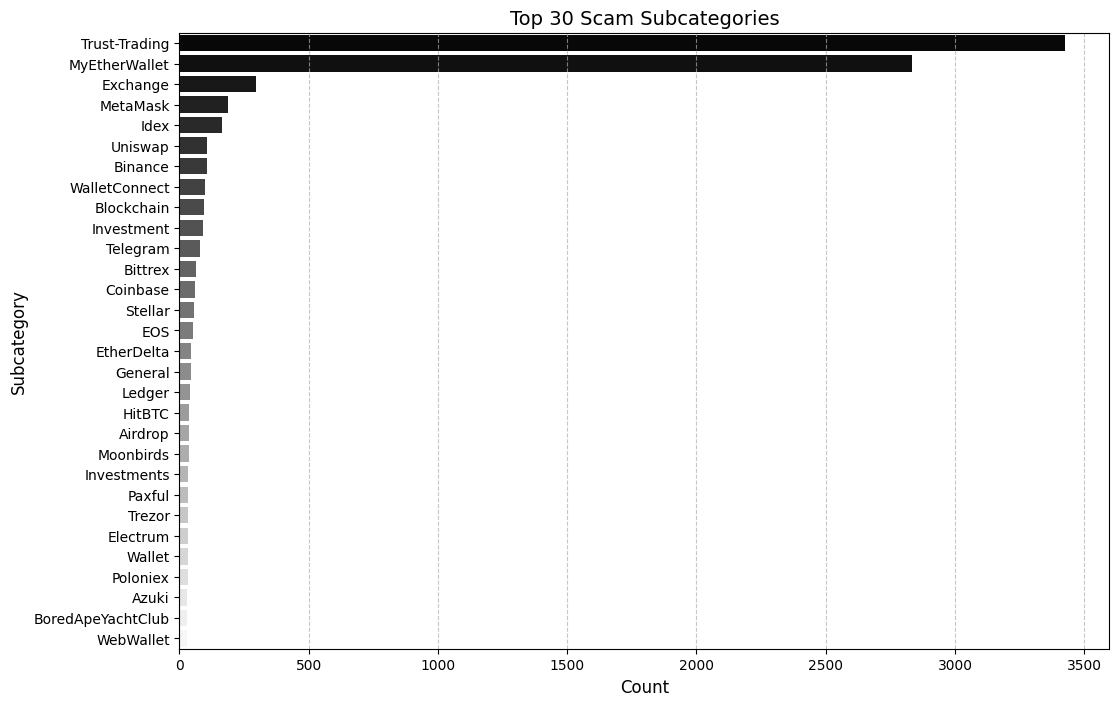

In [ ]:
# subcategory counts
subcategory_counts = df['subcategory'].value_counts().reset_index()
subcategory_counts.columns = ['subcategory', 'count']

# Filter
top_n = 30 
subcategory_counts = subcategory_counts.head(top_n)

plt.figure(figsize=(12, 8))  # Ajustamos tamaño

sns.barplot(data=subcategory_counts, y="subcategory", x="count", palette="grey", hue= "subcategory", legend= False
)

plt.title(f"Top {top_n} Scam Subcategories", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Subcategory", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


Analyzing "reporter" data

In [ ]:
print(f"Reporting sources:\n{df["reporter"].value_counts()}")

Reporting sources:
reporter
CryptoScamDB    9880
Coinbase          23
Name: count, dtype: int64


Plot addresses per category

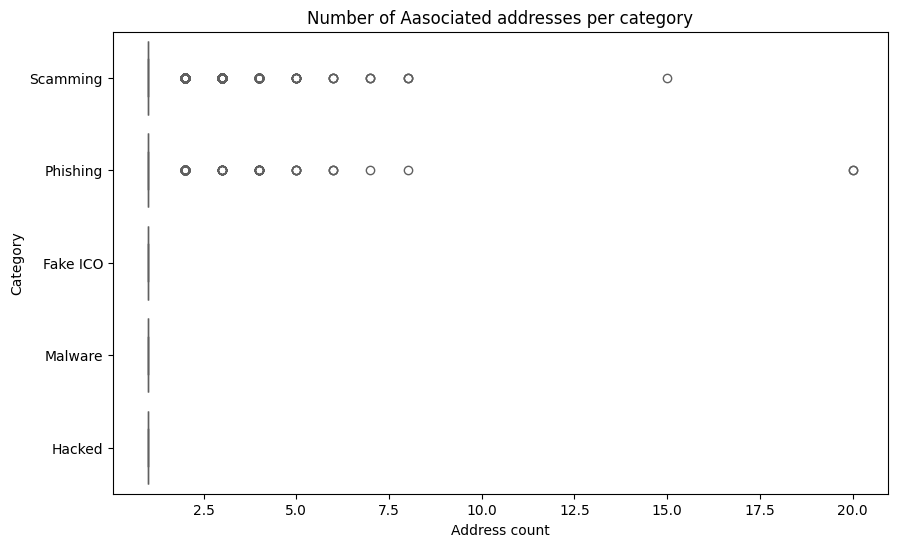

In [ ]:
address_count = df["addresses"].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
df["address_count"] = address_count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="address_count", y="category",hue="category", palette="coolwarm")
plt.title("Number of asociated addresses per category")
plt.xlabel("Address count")
plt.ylabel("Category")
plt.show()

Word frecuency analysis

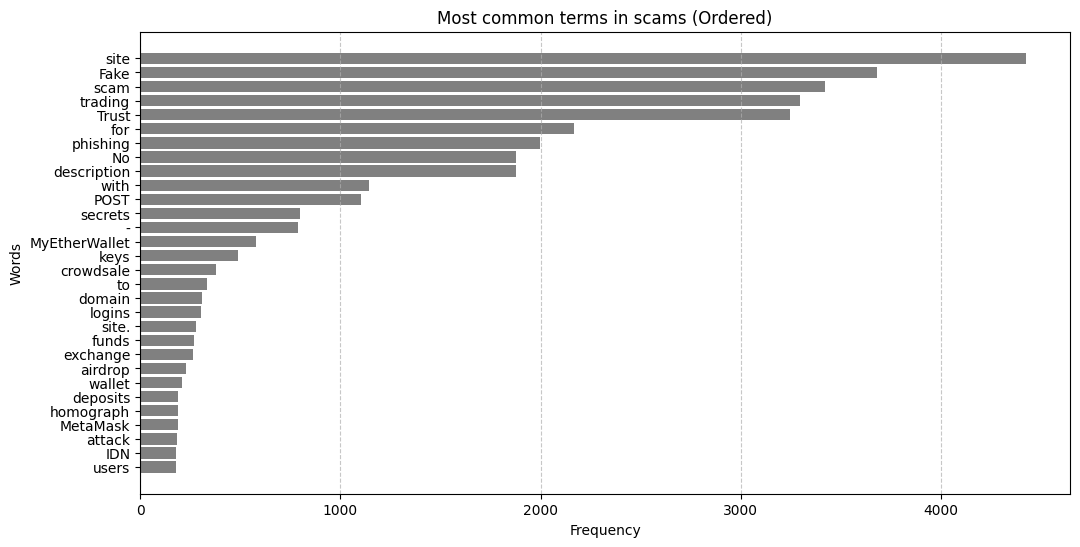

In [ ]:
# Turn column "description" into string
description_text = ' '.join(df["description"].dropna().astype(str).tolist())

# Count frecuency of each word
word_counts = Counter(description_text.split())

# Set the 30 most commons words
sorted_words = word_counts.most_common(30)

# Unzip words and counts
words, counts = zip(*sorted_words)

plt.figure(figsize=(12, 6))
plt.barh(words[::-1], counts[::-1], color="grey")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Most common terms in scams (Ordered)")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


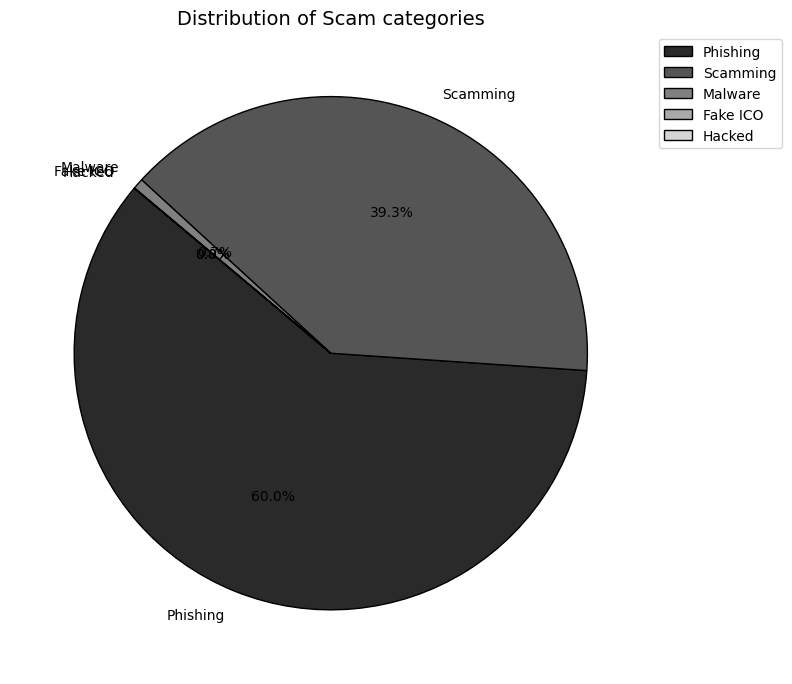

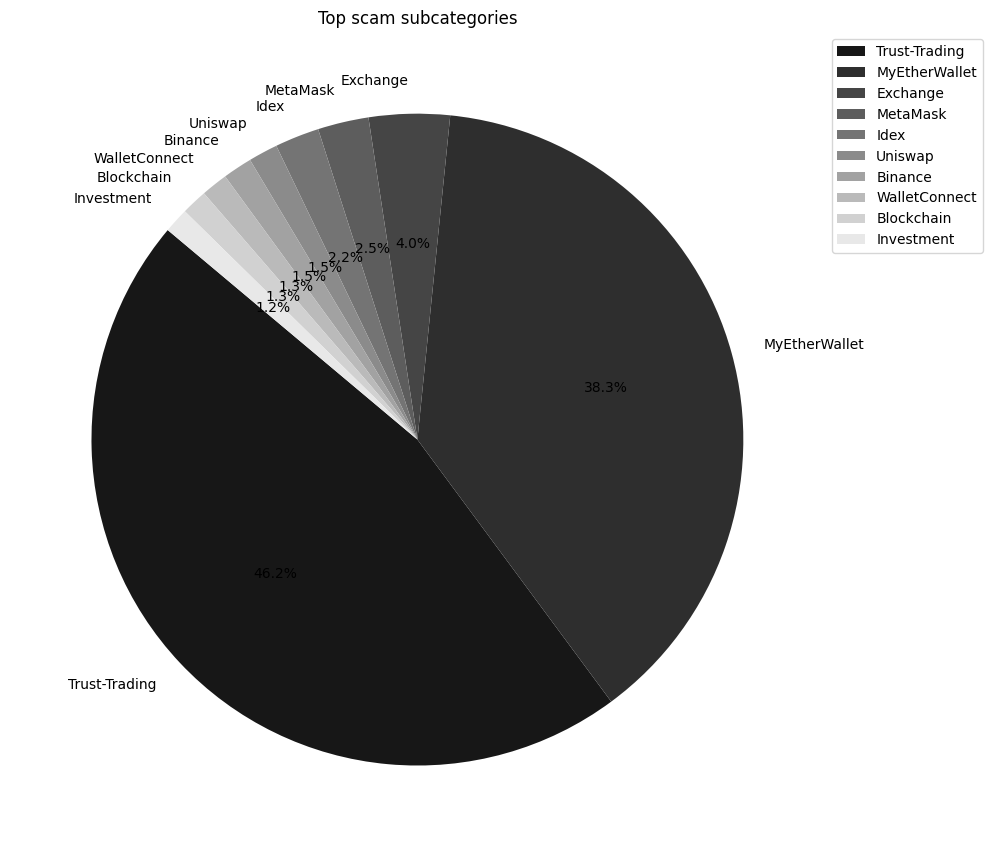

In [ ]:
def plot_category_pie(data):
    category_counts = data["category"].value_counts()
    colors = sns.color_palette("grey", n_colors=len(category_counts))

    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, 
            labels=category_counts.index, 
            autopct='%1.1f%%', 
            startangle=140, 
            colors=colors, 
            wedgeprops={"edgecolor": "black"},
            labeldistance=1.1)

    plt.title("Distribution of Scam categories", fontsize=14)
    plt.legend(category_counts.index, loc="upper left", bbox_to_anchor=(1, 1))  # Mueve la leyenda fuera
    plt.tight_layout()
    plt.show()

def plot_subcategory_pie(data):
    subcategory_counts = data["subcategory"].value_counts()
    top_n = 10
    top_subcategories = subcategory_counts.nlargest(top_n)
    
    colors = sns.color_palette("grey", n_colors=len(top_subcategories))
    
    plt.figure(figsize=(10, 10))
    wedges, texts, autotexts = plt.pie(
        top_subcategories, labels=top_subcategories.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, textprops={"fontsize": 10})


    plt.legend(top_subcategories.index, loc="upper left", bbox_to_anchor=(1, 1))
    plt.title("Top scam subcategories")
    plt.tight_layout()
    plt.show()

plot_category_pie(df)
plot_subcategory_pie(df)